#Stock_Market_Sentiment_Base_Analysis

Here we are gonna do sentiment base analysis of stock market for particular stock data to predict stock (bullish or bearish).

We are implementing NLP Model on stock data which we took from kaggle.com. 

Main goal is to create generalized model with text processing including CounterVectorizer, MultinomialNB and TfidTransformer with Pipeline Architecture. 

At the end we are deploying the model by scraping twitter data related to particular stock and predict bullish or bearish percentage or probability. 

Data Source: https://www.kaggle.com/yash612/stockmarket-sentiment-dataset


#Start by connecting gdrive into the google colab

In [2]:
from google.colab import drive


drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Import Required Libraries

In [3]:
import numpy as np
import pandas as pd

#Load CSV from Google Drive

In [4]:
#df1 = pd.read_csv('/content/gdrive/MyDrive/stock/stock_data.csv',sep=',')
df = pd.read_csv('/content/gdrive/MyDrive/stock/stock_sentiment.csv',sep=',')
#df = df[['Tweet','Sentiment']]
#df = df[df['Sentiment']!="['neutral']"]
#df = df[df['Sentiment']!="0.0"]
#df['Text']=df['Tweet']
#df = df.drop('Tweet',axis=1)
#df['Sentiment'].replace({"['positive']": 'Bull', "['negative']": 'Bear'}, inplace=True)

In [5]:

#df1 = pd.concat([df1[df1['Sentiment']==1][:2107] ,df1[df1['Sentiment']==-1]], ignore_index=True)
#df1['Sentiment'].replace({1: 'Bull', -1: 'Bear'}, inplace=True)
#df1.head()

#Visualisation of Dataset

In [6]:
#df.head() 
#df.info
#df = pd.concat([df[df['Sentiment']=='Bull'][16954:] , df[df['Sentiment']=='Bear']], ignore_index=True)

#df = pd.concat([df1,df], ignore_index=True)

#Replace values of instance "Sentiment" with Bull and Bear

In [7]:
#df['Sentiment'].replace({1: 'Bull', -1: 'Bear'}, inplace=True)

In [8]:
df = df.dropna()
df = df.drop(['Unnamed: 0','text length'],axis=1)


In [9]:
#df.to_csv('stock_sentiment.csv')

In [10]:
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,Bull
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,Bull
2,user I'd be afraid to short AMZN - they are lo...,Bull
3,MNTA Over 12.00,Bull
4,OI Over 21.37,Bull


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16179 entries, 0 to 16178
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       16179 non-null  object
 1   Sentiment  16179 non-null  object
dtypes: object(2)
memory usage: 379.2+ KB


In [12]:
df.describe()

,Text,Sentiment
count,16179,16179
unique,11268,2
top,RT @btccloud: Official Bitcoin Cloud #Airdrop ...,Bull
freq,221,8090


#Create New Column 'Text Length' in Dataset

In [13]:
df['text length']=df['Text'].apply(len)

In [14]:
df.head()

,Text,Sentiment,text length
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,Bull,95
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,Bull,95
2,user I'd be afraid to short AMZN - they are lo...,Bull,114
3,MNTA Over 12.00,Bull,17
4,OI Over 21.37,Bull,16


#Import Visualisation Libraries

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
import plotly.express as px

#Barplot of Sentiment and Text Length

Understand the data by the below given plot, which shows that: For Sentiment Bear Avg. Text Length is Less than Sentiment Bull.

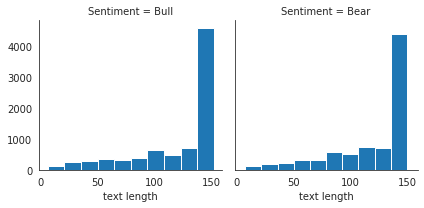

In [16]:
g = sns.FacetGrid(df,col='Sentiment')
g.map(plt.hist,'text length')

In [17]:
plt.figure(figsize=(12,12))
px.histogram(x=df['text length'],color=df['Sentiment'],nbins=40)

<Figure size 864x864 with 0 Axes>

#Boxplot for Sentiment and Text Length

Below plot shows that mean value of text length for sentiment bear is higher than bull, which is opposite to bar plot.

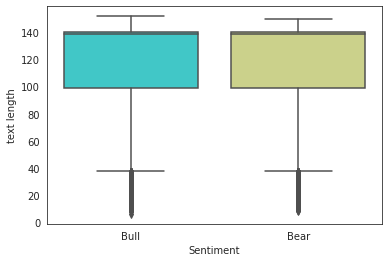

In [18]:
sns.boxplot(x='Sentiment',y='text length',data=df,palette='rainbow')

In [19]:
px.box(x=df['Sentiment'],y=df['text length'])

#Countplot for Sentiment and Text Length

Number of tweet for Bull is more than bear

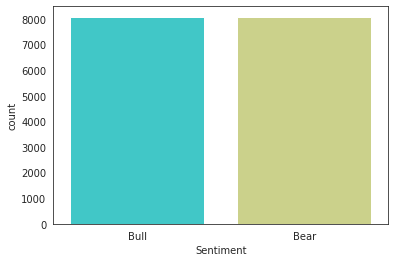

In [20]:
sns.countplot(x='Sentiment',data=df,palette='rainbow')

#Mean of Text Length for both sentiment

In [21]:
stars = df.groupby('Sentiment').mean()
stars

,text length
Sentiment,
Bear,117.021387
Bull,117.199258


#Import CounterVectorizer to transform the data

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. 

This can be visualized as follows –

https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/

#Fit Data MultinomialNB

This can be visualized as follows –

https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf

#Import TfidTransformer

https://medium.com/@hritikattri10/feature-extraction-using-tf-idf-algorithm-44eedb37305e

#Create Pipeline Model and Repeat Above Process

https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf

#Creating NLP Model For Stock Prediction Based On Tweeter Sentiment Analysis (Including Text Processing [Cleaning, Steaming, Contraction Etc.])

In [22]:
import string

mess = 'Hello! I am Sagar : '

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
import string


# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [25]:
nopunc

'Hello I am Sagar  '

In [26]:
from nltk.corpus import stopwords

In [27]:
import nltk 
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [28]:
stopwords.words('english')[0:5]

['i', 'me', 'my', 'myself', 'we']

In [29]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [30]:
clean_mess

['Hello', 'Sagar']

In [31]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [32]:
# Check to make sure its working
df['Text'].head(5).apply(text_process)

0    [Kickers, watchlist, XIDE, TIT, SOQ, PNK, CPW,...
1    [user, AAP, MOVIE, 55, return, FEAGEED, indica...
2    [user, Id, afraid, short, AMZN, looking, like,...
3                                         [MNTA, 1200]
4                                           [OI, 2137]
Name: Text, dtype: object

#Import CounterVectorizer to transform the data

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. 

This can be visualized as follows –

https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
# Might take a while...
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Text'])

# Print total number of vocab words in column 'Text'
print(len(bow_transformer.vocabulary_))

30248


In [35]:
tweet5 = df['Text'].iloc[541]
print(tweet5)

BCEI Over 31.30  


In [36]:
bow4 = bow_transformer.transform([tweet5])
print(bow4)
print(bow4.shape)

  (0, 2856)	1
  (0, 5172)	1
(1, 30248)


In [37]:
print(bow_transformer.get_feature_names()[13100])

Watchist


In [38]:
tweet_bow = bow_transformer.transform(df['Text'])

In [39]:
print('Shape of Sparse Matrix: ', tweet_bow.shape)
print('Amount of Non-Zero occurences: ', tweet_bow.nnz)

Shape of Sparse Matrix:  (16179, 30248)
Amount of Non-Zero occurences:  195656


In [40]:
#Sparsity and density are terms used to describe the percentage of cells in a database table that are not populated and populated, respectively. The sum of the sparsity and density should equal 100%. 
# sparsity = 100 * number of non-zero occurences / (number of rows * number of columns)
sparsity = (100.0 * tweet_bow.nnz / (tweet_bow.shape[0] * tweet_bow.shape[1]))
print('sparsity: {}'.format(sparsity))
# sparsity = 0.026 which means only 2% of datas are non zero from matrix

sparsity: 0.03998018792633634


In [41]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(tweet_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 5172)	0.6984740966463305
  (0, 2856)	0.7156353375247009


In [42]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['talking']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['warns']])

7.858317846556266
8.388946097618437


In [43]:
tweet_tfidf = tfidf_transformer.transform(tweet_bow)
print(tweet_tfidf.shape)

(16179, 30248)


In [44]:
from sklearn.naive_bayes import MultinomialNB
stock_prediction_model = MultinomialNB().fit(tweet_tfidf, df['Sentiment'])

In [45]:
print('predicted:', stock_prediction_model.predict(tfidf4))
print('expected:', df.Sentiment.iloc[9])

predicted: ['Bull']
expected: Bull


In [46]:
all_predictions = stock_prediction_model.predict(tweet_tfidf)
print(all_predictions)

['Bull' 'Bull' 'Bull' ... 'Bear' 'Bear' 'Bear']


              precision    recall  f1-score   support

        Bear       0.97      0.93      0.95      8089
        Bull       0.94      0.97      0.95      8090

    accuracy                           0.95     16179
   macro avg       0.95      0.95      0.95     16179
weighted avg       0.95      0.95      0.95     16179



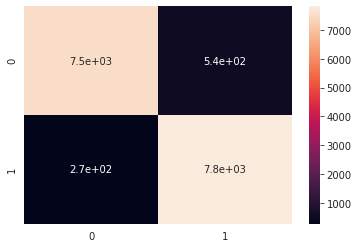

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(df['Sentiment'], all_predictions), annot=True)
print(classification_report(df['Sentiment'], all_predictions))

In [48]:
from sklearn.model_selection import train_test_split

tweet_train, tweet_test, sentiment_train, sentiment_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.3,random_state=101)

print(len(tweet_train), len(tweet_test), len(tweet_train) + len(tweet_test))

11325 4854 16179


In [49]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [50]:
pipeline.fit(tweet_train,sentiment_train)
from sklearn.externals import joblib
  
# Save the model as a pickle in a file
joblib.dump(pipeline, 'Pickle_RL_Model.pkl')
# Save the Modle to file in the current working directory


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



['Pickle_RL_Model.pkl']

In [51]:
predictions = pipeline.predict(tweet_test)

In [52]:
tweet_test

14134    RT @UTEMISUTS: Decentralizing businesses reput...
10871    I have no work.\nBecause I'm a mentally disabl...
4473     RT @Kingsats25: College students taking loans ...
2167           Green Weekly Triangle on KTOS,....pdating  
8459     @CryptoCohle @BTC4USD Satoshi created bitcoin ...
                               ...                        
6192     RT @Cointelegraph: Dutch judge rules #Bitcoin ...
14591    Introduction to POA network, have you seen the...
7677            RT @DadTeq: @lopp Better bitcoin resource:
2058     user:  Somebody explain to me why, AAP has use...
5572     RT @bethereumteam: Do you remember the last ti...
Name: Text, Length: 4854, dtype: object

              precision    recall  f1-score   support

        Bear       0.90      0.83      0.87      2422
        Bull       0.84      0.91      0.88      2432

    accuracy                           0.87      4854
   macro avg       0.87      0.87      0.87      4854
weighted avg       0.87      0.87      0.87      4854



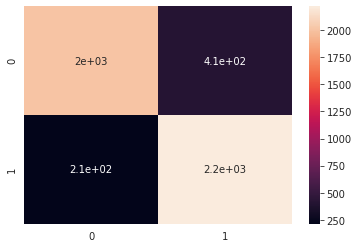

In [53]:
print(classification_report(sentiment_test,predictions))


sns.heatmap(confusion_matrix(sentiment_test,predictions), annot=True)

#Deployment Model For Twitter Sentiment Base Stock Prediction


In [54]:
#generate random number between 0 to 1159 (which is total number of data).
import random

i = random.randint(0,1159)
print('random digit:',i)
print("------------------------------------------------------------------------")

#take random number of tweet (text) for predicting the sentiment behind it
rand = tweet_test.iloc[i]

#preprocess the tweet and put in our created model to predict sentiment 
bow4 = bow_transformer.transform([rand])
print(bow4)
print(bow4.shape)
print("------------------------------------------------------------------------")
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

#result of prediction
print("------------------------------------------------------------------------")
from termcolor import colored
pre1 = stock_prediction_model.predict(tfidf4)[0]
if pre1 == 'Bull':
  print('Predicted:', colored('🐂 BULL', 'green'))
else:
  print('Predicted:', colored('🐻 BEAR', 'red'))


#Prediction for pipeline base model
print("------------------------------------------------------------------------")
ml = pd.DataFrame(tweet_test.head(1))

ml['Text']=ml['Text'].replace(ml['Text'].iloc[0], rand)
pre2 = pipeline.predict(ml)[0]
if pre2 == 'Bull':
  print('Pipe Line Predicted:', colored('🐂 BULL', 'green'))
else:
  print('Pipe Line Predicted:', colored('🐻 BEAR', 'red'))

#check the actual value of sentiment for that predicted tweet
print("------------------------------------------------------------------------")
pre3 = predictions[i]
if pre3 == 'Bull':
  print('Actual:', colored('🐂 BULL', 'green'))
else:
  print('Actual:', colored('🐻 BEAR', 'red'))


#print(colored('🐻 BEAR', 'red'), colored('🐂 BULL', 'green'))

random digit: 35
------------------------------------------------------------------------
  (0, 488)	1
  (0, 986)	1
  (0, 2239)	1
  (0, 2536)	1
  (0, 3021)	1
  (0, 3808)	1
  (0, 10079)	1
  (0, 10840)	1
  (0, 11079)	1
  (0, 12145)	1
  (0, 12190)	1
  (0, 12226)	1
  (0, 12526)	1
  (0, 12561)	1
  (0, 12597)	1
  (0, 12982)	1
  (0, 14869)	1
  (0, 17539)	1
  (0, 18295)	1
(1, 30248)
------------------------------------------------------------------------
  (0, 18295)	0.34615483085198123
  (0, 17539)	0.13499404834806877
  (0, 14869)	0.13343650189346384
  (0, 12982)	0.1413762294681623
  (0, 12597)	0.12682842463867233
  (0, 12561)	0.18741831498648318
  (0, 12526)	0.27206343367296776
  (0, 12226)	0.27206343367296776
  (0, 12190)	0.1360994902361989
  (0, 12145)	0.1272608076801162
  (0, 11079)	0.1360593963373154
  (0, 10840)	0.12927627544276912
  (0, 10079)	0.1360994902361989
  (0, 3808)	0.3081196893157622
  (0, 3021)	0.34615483085198123
  (0, 2536)	0.1324477841448483
  (0, 2239)	0.33211719179226434

#Deployment Model For Twitter Sentiment Base Stock Prediction For Scrap Data

In [55]:

Pickled_LR_Model = joblib.load('Pickle_RL_Model.pkl')




In [56]:
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import tweepy
import json
import pandas as pd
import csv
import re
from textblob import TextBlob
import string
import os
import time
import csv
from six.moves import input



Enter Name of Stock:
$BTC
-----------------------------------------------------------------
2021-04-26 Monday
-----------------------------------------------------------------
$BTC Probability:  BULLISH 56.967651955746454 % |  BEARISH 43.032348044253546 %
-----------------------------------------------------------------
All right reserved by SAGAR NARWADE
-----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



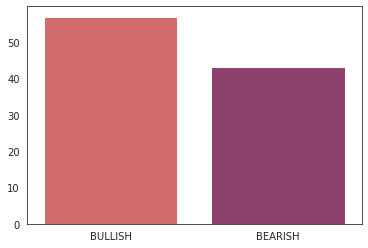

In [57]:
print("Enter Name of Stock:")
search_words = input() # you gonna search by hashtags , the "+" stands for concatenating keywords
from datetime import date, timedelta, datetime

#date = (datetime.now()-timedelta(hours=24)).date() # choose any date with the format "yyyy-mm-dd"
date = date.today()
number_posts = 400

#---------------------------------------------------------------------------

consumer_key = "**************************"
consumer_secret = "**********************************"
access_key = "************************************"
access_secret = "*************************************"
# Pass your twitter credentials to tweepy via its OAuthHandler
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

#----------------------------------------------------------------------------

tweets_text = []

tweets = tweepy.Cursor(api.search, 
                   q=search_words,
                   lang="en",
                   since=date).items(number_posts)
                   
for tweet in tweets:
  tweets_text.append([tweet.text])
  
  
df_Tweet = pd.DataFrame(tweets_text)

df_Tweet['Text']=df_Tweet[0]
df_Tweet.drop(0,axis=1,inplace=True)

df2 = df_Tweet['Text']
#--------------------------------------------------------------------------------------------



# Check to make sure its working
df2.apply(text_process)

#--------------------------------------------------------------------------------------------

predict1 = Pickled_LR_Model.predict(df2)
df_Tweet["Sentiment"]=pd.DataFrame(predict1)
df_Tweet.to_csv('Tweet_Stock.csv', header=["Text","Sentiment"], index=False,)
prob = Pickled_LR_Model.predict_proba(df2)

print("-----------------------------------------------------------------")
prob_per = pd.DataFrame(prob).mean().max()
prob2 = (1-prob_per)*100
bear = pd.DataFrame(prob).mean()[0]
bull = pd.DataFrame(prob).mean()[1]
print(date.today(),date.today().strftime('%A'))
print("-----------------------------------------------------------------")
if bear < bull:
  bull = 'BULLISH'
  bear = 'BEARISH'
  print(search_words,"Probability: ",bull,prob_per*100,"% | ",bear,prob2,"%")
else:
  bull = 'BULLISH'
  bear = 'BEARISH'
  print(search_words,"Probability: ",bear,prob_per*100,"% | ",bull,prob2,"%")
#print("Probability: ", prob)
print("-----------------------------------------------------------------")
print(colored("All right reserved by SAGAR NARWADE",'green'))
#sns.countplot(prob)
#prob[[1,0]].max(axis=1)
prob1 = prob_per*100

print("-----------------------------------------------------------------")
sns.barplot(['BULLISH','BEARISH'],[prob1,prob2],palette="flare")
